# How to create global grids

In [1]:
import nes
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
%matplotlib inline

## 1. Create dataset

### Define grid details

In [3]:
projection = 'global'
inc_lat = 0.5
inc_lon = 0.5

In [4]:
nessy = nes.create_nes(projection=projection, inc_lat=inc_lat, inc_lon=inc_lon)

### Read projection

In [5]:
nessy.projection

<Other Coordinate Operation Transformer: longlat>
Description: PROJ-based coordinate operation
Area of Use:
- undefined

In [6]:
nessy.projection_data

{'grid_mapping_name': 'latitude_longitude',
 'semi_major_axis': 6378137.0,
 'inverse_flattening': 0,
 'inc_lat': 0.5,
 'inc_lon': 0.5,
 'lat_orig': -90,
 'lon_orig': -180,
 'n_lat': 360,
 'n_lon': 720}

## 2. Plot

In [7]:
nessy.create_shapefile()

,geometry
FID,
0,"POLYGON ((-180 -90, -179.5 -90, -179.5 -89.5, ..."
1,"POLYGON ((-179.5 -90, -179 -90, -179 -89.5, -1..."
2,"POLYGON ((-179 -90, -178.5 -90, -178.5 -89.5, ..."
3,"POLYGON ((-178.5 -90, -178 -90, -178 -89.5, -1..."
4,"POLYGON ((-178 -90, -177.5 -90, -177.5 -89.5, ..."
...,...
259195,"POLYGON ((177.5 89.5, 178 89.5, 178 90, 177.5 ..."
259196,"POLYGON ((178 89.5, 178.5 89.5, 178.5 90, 178 ..."
259197,"POLYGON ((178.5 89.5, 179 89.5, 179 90, 178.5 ..."


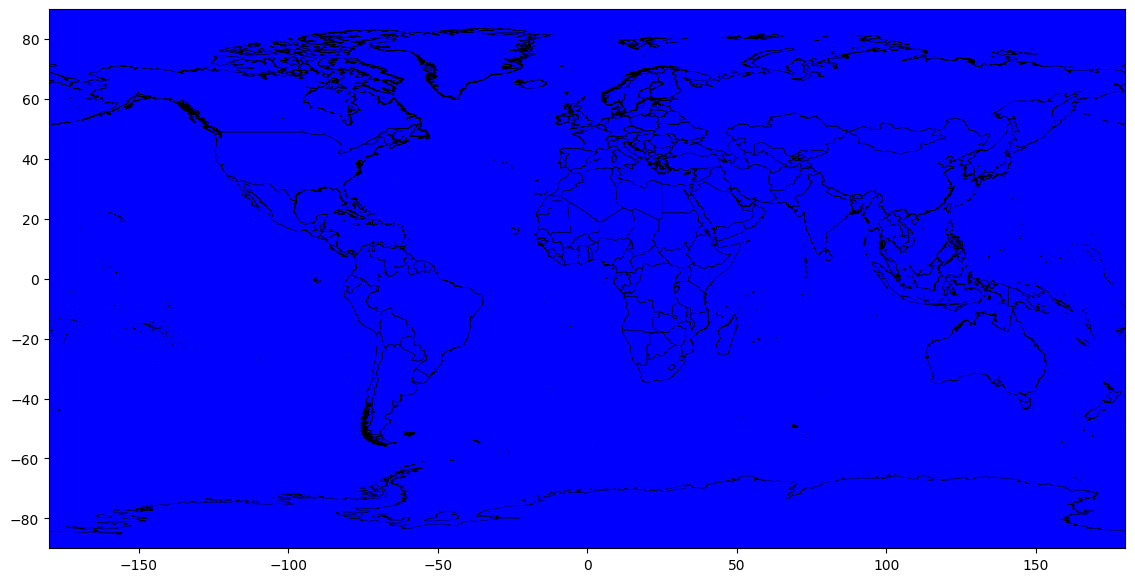

In [8]:
fig, ax = plt.subplots(1, figsize=(19, 7))
nessy.shapefile.plot(ax=ax, facecolor='blue', edgecolor='blue')
countries = gpd.read_file('/gpfs/projects/bsc32/models/NES_tutorial_data/gadm_country_mask/gadm_country_ISO3166.shp')
countries.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.3)
ax.margins(0)

## 3. Write dataset

### Write NetCDF

In [9]:
nessy.to_netcdf('global_grid.nc', info=True)

Rank 000: Creating global_grid.nc
Rank 000: NetCDF ready to write
Rank 000: Dimensions done


### Write shapefile

In [10]:
nessy.to_shapefile('global_grid_shp')

/home/bsc/bsc032781/.local/lib/python3.9/site-packages/nes/nc_projections/default_nes.py:3805: UserWarning: No vertical level has been specified. The first one will be selected.
  warn(msg)
/home/bsc/bsc032781/.local/lib/python3.9/site-packages/nes/nc_projections/default_nes.py:3816: UserWarning: No time has been specified. The first one will be selected.
  warn(msg)
